<a href="https://colab.research.google.com/github/Budigijaswanth/Business-Analytics/blob/main/Aml_Assignment_1_jaswanth_Budigi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load imd dataset**

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# display train data
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [ ]:
train_labels[1]

0

In [ ]:
len(train_labels)

25000

In [ ]:
test_labels[0]

0

### Using list comprehension and the max function, find out the maximum value in training data sequence.


In [ ]:
max_values = max(map(max, train_data))

In [ ]:
print(f" output the maximum vlaue : {max_values}")

 output the maximum vlaue : 9999


**write the code of the Data Preparation**

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    #Prepare a matrix of zeros with the dimensions and an instance of each number of sequences.

    results = np.zeros((len(sequences), dimension))

   # It is done by setting the indices to 1 with the help of a powerful function of NumPy targeting the specific indices using reference to numpy array indexing
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results


Vectorization of Data

In [ ]:
j_train = vectorize_sequences(train_data)
j_test = vectorize_sequences(test_data)

In [ ]:
j_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
j_test[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# NumPy based  on the label vectorization
z_train = np.array(train_labels, dtype="float32")
z_test = np.array(test_labels, dtype="float32")


**Model of the Building**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

#  input layer
inputs = keras.Input(shape=(10000,))

# hidden layer of the i activation of the Relu
j = layers.Dense(16, activation="relu")(inputs)

# hidden layer of the 2nd actvation of Relu
z = layers.Dense(16, activation="relu")(inputs)

#  sigmoid activation  coming to the output  and classification of binnary
outputs = layers.Dense(1, activation="sigmoid")(inputs)

# model of the def
models= keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
#To compile the model a loss function together with an optimizer should be used as described below.
models.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
j_value = j_train[:10000]
part_j_train = j_train[10000:]
z_value = z_train[:10000]
part_z_train = z_train[10000:]

In [ ]:
history = models.fit(
    part_j_train,
    part_z_train,
    epochs=20,
    batch_size=512,
    validation_data=(j_value, z_value),
    verbose=1
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6838 - loss: 0.6428 - val_accuracy: 0.8155 - val_loss: 0.5596
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8400 - loss: 0.5294 - val_accuracy: 0.8382 - val_loss: 0.4976
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8670 - loss: 0.4640 - val_accuracy: 0.8544 - val_loss: 0.4527
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8812 - loss: 0.4177 - val_accuracy: 0.8599 - val_loss: 0.4203
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8926 - loss: 0.3807 - val_accuracy: 0.8690 - val_loss: 0.3934
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8989 - loss: 0.3527 - val_accuracy: 0.8715 - val_loss: 0.3748
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9048 - loss: 0.3311 - val_accuracy: 0.8772 - val_loss: 0.3569
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9138 - loss: 0.3078 - val_accuracy: 0.8799 - v

In [ ]:
history_dictionary = dict(history.history)
keys = list(history_dictionary.keys())

print(keys)

['accuracy', 'loss', 'val_accuracy', 'val_loss']


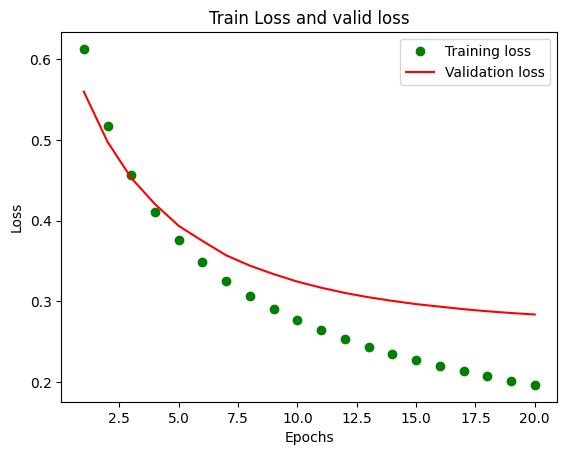

In [ ]:
import matplotlib.pyplot as plt
history_dictionary = dict(history.history)
keys = list(history_dictionary.keys())
value_loss = history_dictionary["loss"]
loss_values_val = history_dictionary["val_loss"]
epochs = range(1, len(value_loss ) + 1)
#plot the grap training and validation loss
plt.plot(epochs , value_loss, "go", label="Training loss")
plt.plot(epochs , loss_values_val, "r", label="Validation loss")
plt.title("Train Loss and valid loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

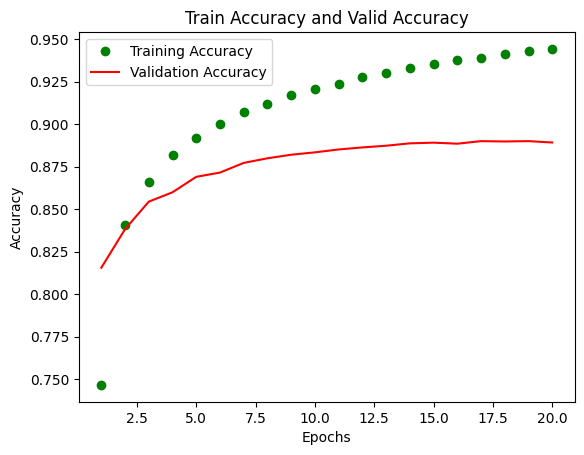

In [ ]:
plt.clf()
#plot the grap train and valid accuracy
plt.plot(epochs, history_dictionary["accuracy"], "go", label="Training Accuracy")
plt.plot(epochs , history_dictionary["val_accuracy"], "r", label="Validation Accuracy")
plt.title("Train Accuracy and Valid Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
models = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
models.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
models.fit(j_train, z_train, epochs=4, batch_size=512)
result = models.evaluate(j_test, z_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7227 - loss: 0.5770
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9005 - loss: 0.2957
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9234 - loss: 0.2180
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9351 - loss: 0.1827
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8810 - loss: 0.2952


In [ ]:
# print the result
print(result)

[0.2953122556209564, 0.8815199732780457]


Accuracy value is 88% and Loss Valuue is 0.288

In [ ]:
# predict the data new
models.predict(j_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.1791758 ],
       [0.99988204],
       [0.8329358 ],
       ...,
       [0.08340909],
       [0.06822099],
       [0.4688588 ]], dtype=float32)

**HIDDEEN LAYER 1**

In [ ]:

model_1_Hiddenlayer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1_Hiddenlayer.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=["accuracy"])

j_value_1 = j_train[:10000]
part_j_train = j_train[10000:]
z_value_1 = z_train[:10000]
part_z_train = z_train[10000:]


historys1_layer = model_1_Hiddenlayer.fit(part_j_train,part_z_train,epochs=20,
                    batch_size=512,
                    validation_data=(j_value_1, z_value_1))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7141 - loss: 0.5776 - val_accuracy: 0.8681 - val_loss: 0.3952
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8959 - loss: 0.3444 - val_accuracy: 0.8847 - val_loss: 0.3252
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9186 - loss: 0.2670 - val_accuracy: 0.8852 - val_loss: 0.3001
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9295 - loss: 0.2236 - val_accuracy: 0.8812 - val_loss: 0.2966
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9407 - loss: 0.1935 - val_accuracy: 0.8848 - val_loss: 0.2857
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9469 - loss: 0.1710 - val_accuracy: 0.8885 - val_loss: 0.2742
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9552 - loss: 0.1543 - val_accuracy: 0.8880 - val_loss: 0.2764
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9615 - loss: 0.1381 - val_accuracy: 0.8826 - v

In [ ]:
history_dictionary_1 = dict(history.history)
keys = list(history_dictionary_1.keys())

print(keys)

['accuracy', 'loss', 'val_accuracy', 'val_loss']


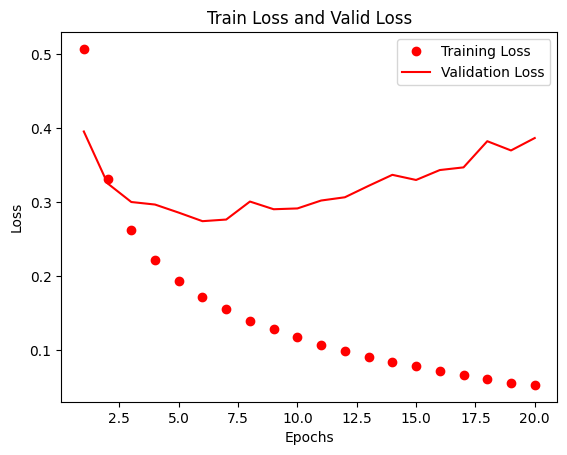

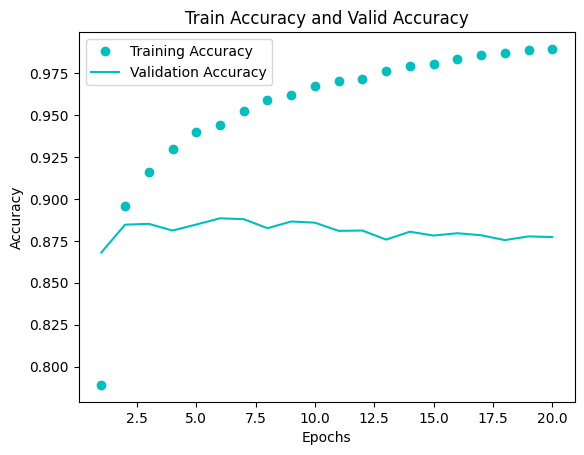

In [ ]:
import matplotlib.pyplot as plt
history_dictionary_1 = historys1_layer.history
loss_value_1 = history_dictionary_1["loss"]
val_loss_value_1 = history_dictionary_1["val_loss"]
epochs_1 = range(1, len(loss_value_1) + 1)
# plot the graphing train and valid loss
plt.plot(epochs_1, loss_value_1, "ro", label="Training Loss")  # Corrected variable names
plt.plot(epochs_1, val_loss_value_1, "r", label="Validation Loss")  # Corrected variable names
plt.title("Train Loss and Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# plot the graphing train and valid accuracy
plt.clf()  # clearing the current the fig
Accuracy_1 = history_dictionary_1["accuracy"]
value_Accuracy_1 = history_dictionary_1["val_accuracy"]
plt.plot(epochs_1, Accuracy_1 , "co", label="Training Accuracy")
plt.plot(epochs_1, value_Accuracy_1, "c", label="Validation Accuracy")
plt.title("Train Accuracy and Valid Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_1_Hiddenlayer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1_Hiddenlayer.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=["accuracy"])
model_1_Hiddenlayer.fit(j_train, z_train, epochs=5, batch_size=512)
Hiddenlayer_result = model_1_Hiddenlayer.evaluate(j_test, z_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7304 - loss: 0.5484
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9025 - loss: 0.2943
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9226 - loss: 0.2276
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9303 - loss: 0.1983
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9433 - loss: 0.1716
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8835 - loss: 0.2840


In [ ]:
#print the result hidden layer 1
print(Hiddenlayer_result)

[0.2824423015117645, 0.8863199949264526]


**Result for the Hidden Layer 1
Accuracy = 0.88
Loss = 0.28**

In [ ]:
model_1_Hiddenlayer.predict(j_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.22093919],
       [0.999652  ],
       [0.7186314 ],
       ...,
       [0.101038  ],
       [0.08413704],
       [0.49698877]], dtype=float32)

**3 Hidden Layer**

In [ ]:
model_3_Hiddenlayer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3_Hiddenlayer.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=["accuracy"])

j_value_3 = j_train[:10000]
part_j_train = j_train[10000:]
z_value_3 = z_train[:10000]
part_z_train = z_train[10000:]


historys3_layer = model_3_Hiddenlayer.fit(part_j_train,part_z_train,epochs=20,
                    batch_size=512,
                    validation_data=(j_value_3, z_value_3))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6753 - loss: 0.6228 - val_accuracy: 0.8364 - val_loss: 0.4298
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8865 - loss: 0.3513 - val_accuracy: 0.8798 - val_loss: 0.3129
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9219 - loss: 0.2387 - val_accuracy: 0.8635 - val_loss: 0.3348
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9353 - loss: 0.1907 - val_accuracy: 0.8888 - val_loss: 0.2797
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9479 - loss: 0.1568 - val_accuracy: 0.8862 - val_loss: 0.2906
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9635 - loss: 0.1190 - val_accuracy: 0.8836 - val_loss: 0.3072
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9691 - loss: 0.0992 - val_accuracy: 0.8821 - val_loss: 0.3313
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9775 - loss: 0.0789 - val_accuracy: 0.8847 - v

In [ ]:
history_dictionary_3 = dict(history.history)
keys = list(history_dictionary_3.keys())

print(keys)

['accuracy', 'loss', 'val_accuracy', 'val_loss']


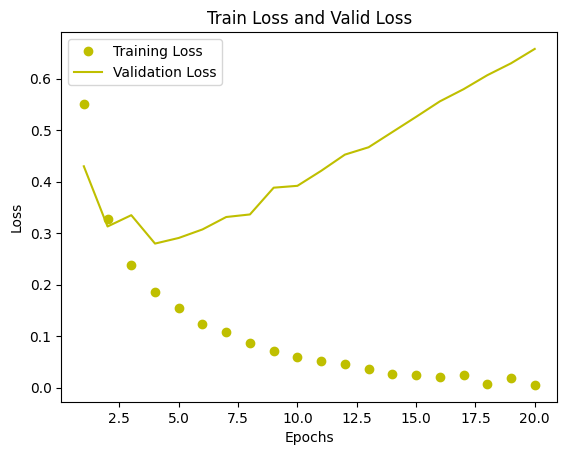

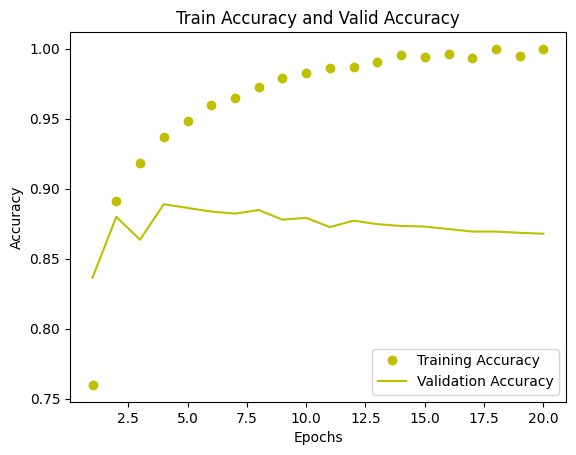

In [ ]:
history_dictionary_3 = historys3_layer.history
loss_value_3 = history_dictionary_3["loss"]
val_loss_value_3 = history_dictionary_3["val_loss"]
epochs_3 = range(1, len(loss_value_3) + 1)
# plot the graph train and valid loss
plt.plot(epochs_3, loss_value_3, "yo", label="Training Loss")
plt.plot(epochs_3, val_loss_value_3, "y", label="Validation Loss")
plt.title("Train Loss and Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ploting  graph train and valid accuracy
plt.clf()
Accuracy_3 = history_dictionary_3["accuracy"]
value_accuracy_3 = history_dictionary_3["val_accuracy"]
plt.plot(epochs_3, Accuracy_3, "yo", label="Training Accuracy")
plt.plot(epochs_3, value_accuracy_3, "y", label="Validation Accuracy")
plt.title("Train Accuracy and Valid Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_3_Hiddenlayer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3_Hiddenlayer.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=["accuracy"])
model_3_Hiddenlayer.fit(j_train, z_train, epochs=3, batch_size=512)
Hiddenlayer_result_3 = model_3_Hiddenlayer.evaluate(j_test, z_test)
# print the hidden layer 3 output
print(Hiddenlayer_result_3)

model_3_Hiddenlayer.predict(j_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6990 - loss: 0.6282
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8846 - loss: 0.3707
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9114 - loss: 0.2605
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8828 - loss: 0.2908
[0.29190799593925476, 0.8835999965667725]
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.25228179],
       [0.9895136 ],
       [0.6764196 ],
       ...,
       [0.09271724],
       [0.12581909],
       [0.43733844]], dtype=float32)

**Hidden 32 Units and 2 layers**

In [ ]:
model_unit32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# compilation
model_unit32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
J_value_32 = j_train[:10000]
part_j_train = j_train[10000:]

z_value_32 = z_train[:10000]
part_y_train = z_train[10000:]


history_32_units = model_unit32.fit(part_j_train,
                    part_z_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(J_value_32, z_value_32))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6734 - loss: 0.5977 - val_accuracy: 0.8517 - val_loss: 0.3858
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8912 - loss: 0.3165 - val_accuracy: 0.8760 - val_loss: 0.3130
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9241 - loss: 0.2228 - val_accuracy: 0.8835 - val_loss: 0.2910
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9357 - loss: 0.1839 - val_accuracy: 0.8856 - val_loss: 0.2864
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9467 - loss: 0.1522 - val_accuracy: 0.8856 - val_loss: 0.2936
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9582 - loss: 0.1221 - val_accuracy: 0.8781 - val_loss: 0.3131
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9690 - loss: 0.1012 - val_accuracy: 0.8766 - val_loss: 0.3232
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9713 - loss: 0.0889 - val_accuracy: 0.8824 - v

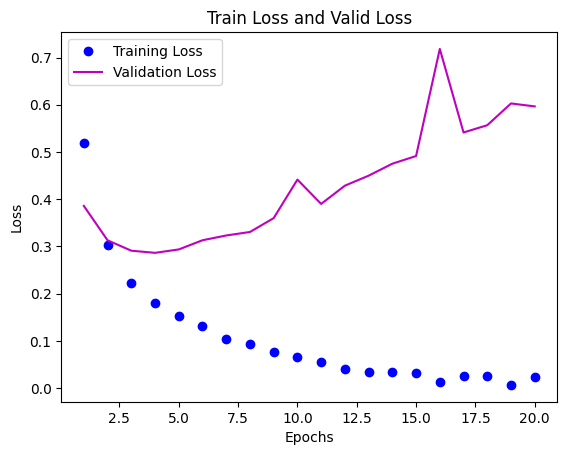

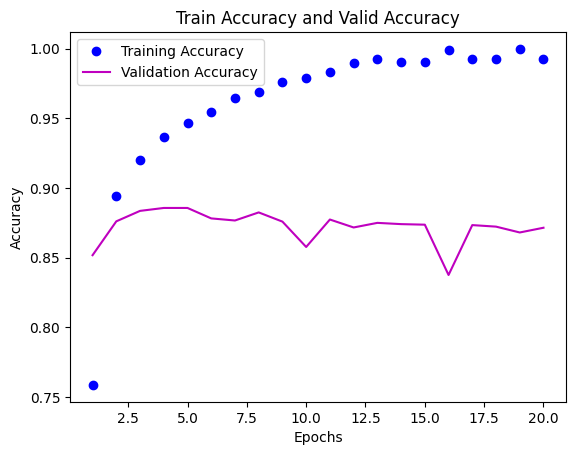

In [ ]:
history_dictionary_unit32 = history_32_units.history
loss_value_unit32 = history_dictionary_unit32["loss"]
val_loss_value_unit32 = history_dictionary_unit32["val_loss"]
epochs_unit32 = range(1, len(loss_value_3) + 1)
# plot the graph train and valid loss
plt.plot(epochs_unit32, loss_value_unit32, "bo", label="Training Loss")
plt.plot(epochs_unit32, val_loss_value_unit32, "m", label="Validation Loss")
plt.title("Train Loss and Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ploting  graph train and valid accuracy
plt.clf()
Accuracy_unit32 = history_dictionary_unit32["accuracy"]
value_accuracy_unit32 = history_dictionary_unit32["val_accuracy"]
plt.plot(epochs_unit32, Accuracy_unit32, "bo", label="Training Accuracy")
plt.plot(epochs_unit32, value_accuracy_unit32, "m", label="Validation Accuracy")
plt.title("Train Accuracy and Valid Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_unit32.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=["accuracy"])
model_unit32.fit(j_train, z_train, epochs=3, batch_size=512)
result_32unit = model_unit32.evaluate(j_test, z_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9401 - loss: 0.2232
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9658 - loss: 0.1138
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9750 - loss: 0.0805
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8636 - loss: 0.4117


In [ ]:
print(result_32unit)

[0.40790438652038574, 0.8655999898910522]


**Result**

Train and valid loss is= 0.41

Train and valid Accuracy is = 0.86

In [ ]:
model_unit32.predict(j_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.01723832],
       [0.99999917],
       [0.21707983],
       ...,
       [0.03656816],
       [0.02055649],
       [0.89994246]], dtype=float32)

**64 Units and 3 layers**

In [ ]:
model_unit64 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#compilation
model_unit64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#validation
J_value_64 = j_train[:10000]
part_j_train = j_train[10000:]

z_value_64 = z_train[:10000]
part_y_train = z_train[10000:]


history_64_units = model_unit64.fit(part_j_train,
                    part_z_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(J_value_64, z_value_64))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6548 - loss: 0.6173 - val_accuracy: 0.8342 - val_loss: 0.4075
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8920 - loss: 0.3222 - val_accuracy: 0.8685 - val_loss: 0.3232
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9161 - loss: 0.2362 - val_accuracy: 0.8837 - val_loss: 0.2878
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9382 - loss: 0.1790 - val_accuracy: 0.8785 - val_loss: 0.3028
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9464 - loss: 0.1539 - val_accuracy: 0.8839 - val_loss: 0.2992
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9572 - loss: 0.1234 - val_accuracy: 0.8727 - val_loss: 0.3369
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9671 - loss: 0.1009 - val_accuracy: 0.8553 - val_loss: 0.4287
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9742 - loss: 0.0804 - val_accuracy: 0.8780 - v

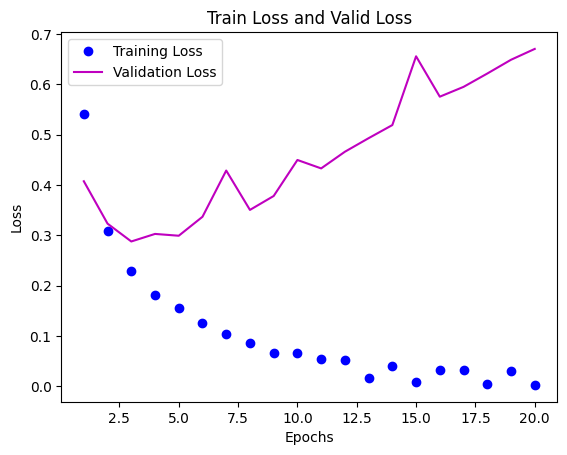

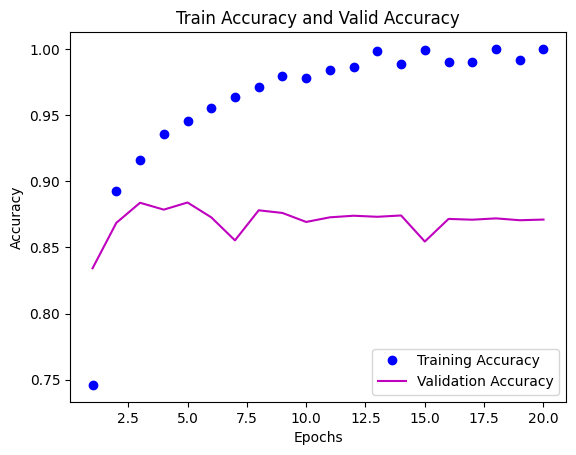

In [ ]:
history_dictionary_unit64 = history_64_units.history
loss_value_unit64 = history_dictionary_unit64["loss"]
val_loss_value_unit64 = history_dictionary_unit64["val_loss"]
epochs_unit64 = range(1, len(loss_value_3) + 1)
# plot the graph train and valid loss
plt.plot(epochs_unit64, loss_value_unit64, "bo", label="Training Loss")
plt.plot(epochs_unit64, val_loss_value_unit64, "m", label="Validation Loss")
plt.title("Train Loss and Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ploting  graph train and valid accuracy
plt.clf()
Accuracy_unit64 = history_dictionary_unit64["accuracy"]
value_accuracy_unit64 = history_dictionary_unit64["val_accuracy"]
plt.plot(epochs_unit64, Accuracy_unit64, "bo", label="Training Accuracy")
plt.plot(epochs_unit64, value_accuracy_unit64, "m", label="Validation Accuracy")
plt.title("Train Accuracy and Valid Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_unit64.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=["accuracy"])
model_unit64.fit(j_train, z_train, epochs=3, batch_size=512)
result_64unit = model_unit64.evaluate(j_test, z_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9356 - loss: 0.2756
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9657 - loss: 0.1167
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9754 - loss: 0.0834
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8643 - loss: 0.4364


In [ ]:
print(result_64unit)

[0.42822784185409546, 0.86735999584198]


In [ ]:
model_unit64.predict(j_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.0216359 ],
       [0.99998343],
       [0.18397434],
       ...,
       [0.13141364],
       [0.01099084],
       [0.94525754]], dtype=float32)

**Result**

Train and valid loss is= 0.46

Train and valid Accuracy is = 0.86

**Using MSE loss function Instead of Binary crosssentrpy**

In [ ]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",# using mse
              metrics=["accuracy"])
# validation
J_value_MSE = j_train[:10000]
part_j_train = j_train[10000:]

z_value_MSE = z_train[:10000]
part_y_train = z_train[10000:]


history_MSE = model_MSE.fit(part_j_train,
                    part_z_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(J_value_MSE, z_value_MSE))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.7088 - loss: 0.1970 - val_accuracy: 0.8661 - val_loss: 0.1260
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8886 - loss: 0.1097 - val_accuracy: 0.8720 - val_loss: 0.1075
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9149 - loss: 0.0841 - val_accuracy: 0.8821 - val_loss: 0.0955
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9275 - loss: 0.0707 - val_accuracy: 0.8888 - val_loss: 0.0888
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9365 - loss: 0.0619 - val_accuracy: 0.8788 - val_loss: 0.0913
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9446 - loss: 0.0561 - val_accuracy: 0.8865 - val_loss: 0.0873
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9500 - loss: 0.0505 - val_accuracy: 0.8883 - val_loss: 0.0849
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9557 - loss: 0.0461 - val_accuracy: 0.8824 - v

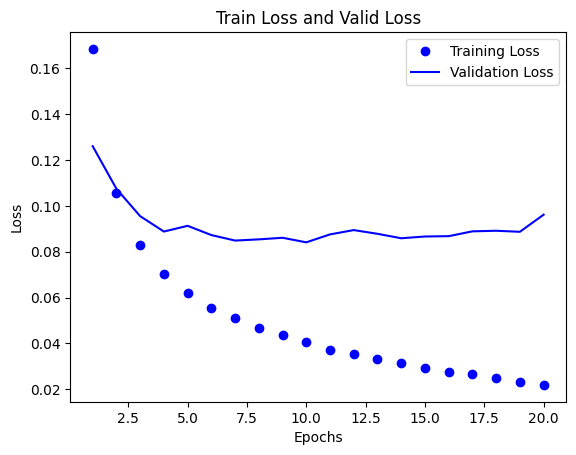

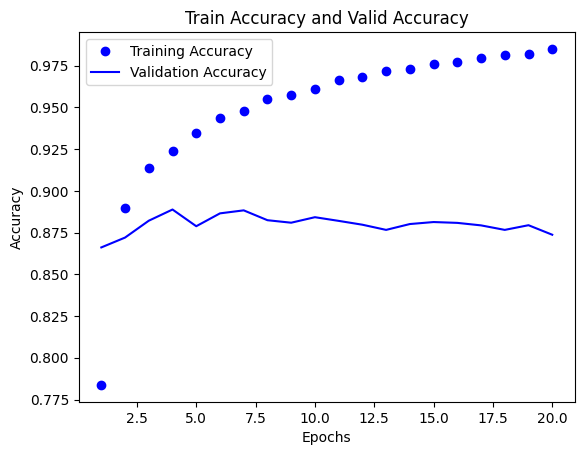

In [ ]:

history_dictionary_MSE = history_MSE.history
loss_value_MSE = history_dictionary_MSE["loss"]
val_loss_value_MSE = history_dictionary_MSE["val_loss"]
epochs_MSE = range(1, len(loss_value_MSE) + 1)
# plot the graph train and valid loss
plt.plot(epochs_MSE, loss_value_MSE, "bo", label="Training Loss")
plt.plot(epochs_MSE, val_loss_value_MSE, "b", label="Validation Loss")
plt.title("Train Loss and Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ploting  graph train and valid accuracy
plt.clf()
Accuracy_MSE = history_dictionary_MSE["accuracy"]
value_accuracy_MSE = history_dictionary_MSE["val_accuracy"]
plt.plot(epochs_MSE, Accuracy_MSE, "bo", label="Training Accuracy")
plt.plot(epochs_MSE, value_accuracy_MSE, "b", label="Validation Accuracy")
plt.title("Train Accuracy and Valid Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_MSE.fit(j_train, z_train, epochs=6, batch_size=512)
result_MSE = model_MSE.evaluate(j_test, z_test)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9407 - loss: 0.0487
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9508 - loss: 0.0428
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9605 - loss: 0.0377
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9617 - loss: 0.0369
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9661 - loss: 0.0336
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9692 - loss: 0.0320
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8686 - loss: 0.0971


In [ ]:
model_MSE.predict(j_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.055655  ],
       [0.9999129 ],
       [0.66980064],
       ...,
       [0.142479  ],
       [0.05838787],
       [0.78635925]], dtype=float32)

In [ ]:
print(result_MSE)


[0.09472039341926575, 0.8725600242614746]


 **Result**

 0.09

 0.87


**Instead of 'Relu' i  am using 'Tanh'**

In [ ]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
# compilation
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
J_value_tanh = j_train[:10000]
part_j_train = j_train[10000:]

z_value_tanh = z_train[:10000]
part_y_train = z_train[10000:]


history_tanh = model_tanh.fit(part_j_train,
                    part_z_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(J_value_tanh, z_value_tanh))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7013 - loss: 0.5871 - val_accuracy: 0.8512 - val_loss: 0.4115
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8930 - loss: 0.3517 - val_accuracy: 0.8834 - val_loss: 0.3263
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9162 - loss: 0.2695 - val_accuracy: 0.8813 - val_loss: 0.3079
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9324 - loss: 0.2233 - val_accuracy: 0.8859 - val_loss: 0.2836
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9411 - loss: 0.1903 - val_accuracy: 0.8852 - val_loss: 0.2809
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9481 - loss: 0.1696 - val_accuracy: 0.8880 - val_loss: 0.2770
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9557 - loss: 0.1486 - val_accuracy: 0.8867 - val_loss: 0.2769
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9623 - loss: 0.1326 - val_accuracy: 0.8858 - v

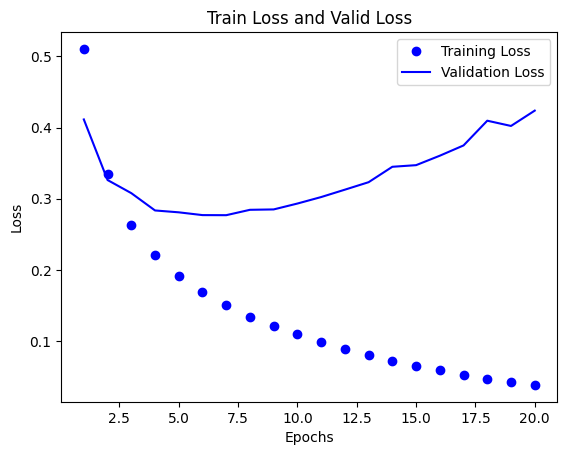

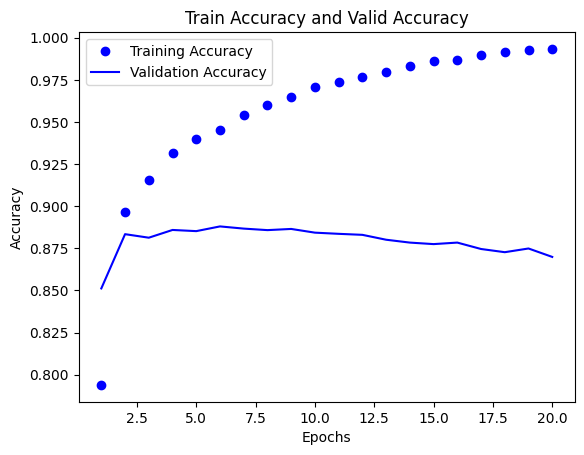

In [ ]:
history_dictionary_tanh = history_tanh.history
loss_value_tanh = history_dictionary_tanh["loss"]
val_loss_value_tanh = history_dictionary_tanh["val_loss"]
epochs_tanh = range(1, len(loss_value_tanh) + 1)
# plot the graph train and valid loss
plt.plot(epochs_tanh, loss_value_tanh, "bo", label="Training Loss")
plt.plot(epochs_tanh, val_loss_value_tanh, "b", label="Validation Loss")
plt.title("Train Loss and Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ploting  graph train and valid accuracy
plt.clf()
Accuracy_tanh = history_dictionary_tanh["accuracy"]
value_accuracy_tanh = history_dictionary_tanh["val_accuracy"]
plt.plot(epochs_tanh, Accuracy_tanh, "bo", label="Training Accuracy")
plt.plot(epochs_tanh, value_accuracy_tanh, "b", label="Validation Accuracy")
plt.title("Train Accuracy and Valid Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_tanh.fit(j_train, z_train, epochs=6, batch_size=512)
result_tanh = model_tanh.evaluate(j_test, z_test)
print(result_tanh)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9479 - loss: 0.1848
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9574 - loss: 0.1360
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9656 - loss: 0.1180
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9701 - loss: 0.1013
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9739 - loss: 0.0907
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9763 - loss: 0.0832
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8608 - loss: 0.4451
[0.43740084767341614, 0.8635600209236145]


**Using Adam operator**

In [ ]:
model_Adam = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
# compilation
model_Adam.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
J_value_Adam = j_train[:10000]
part_j_train = j_train[10000:]

z_value_Adam = z_train[:10000]
part_y_Adam = z_train[10000:]


history_Adam = model_Adam.fit(part_j_train,
                    part_z_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(J_value_tanh, z_value_tanh))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6971 - loss: 0.6093 - val_accuracy: 0.8566 - val_loss: 0.4020
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8989 - loss: 0.3200 - val_accuracy: 0.8831 - val_loss: 0.2977
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9367 - loss: 0.2068 - val_accuracy: 0.8875 - val_loss: 0.2766
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9578 - loss: 0.1488 - val_accuracy: 0.8864 - val_loss: 0.2784
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9745 - loss: 0.1102 - val_accuracy: 0.8833 - val_loss: 0.2940
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9834 - loss: 0.0783 - val_accuracy: 0.8812 - val_loss: 0.3158
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9893 - loss: 0.0612 - val_accuracy: 0.8765 - val_loss: 0.3405
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9938 - loss: 0.0461 - val_accuracy: 0.8741 - v

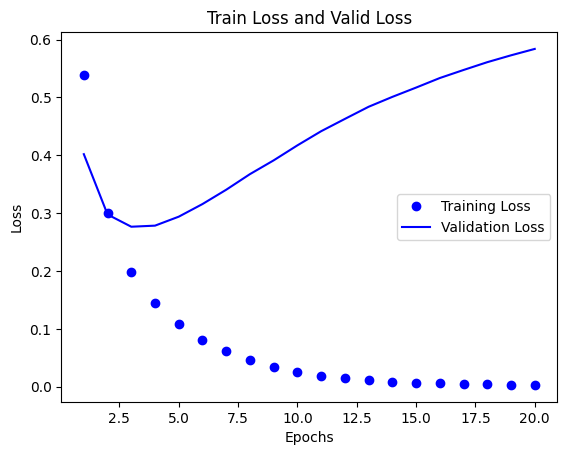

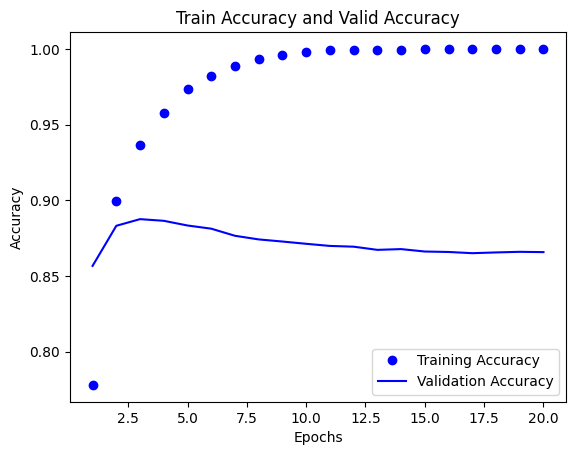

In [ ]:
history_dictionary_adam = history_Adam.history
loss_value_adam = history_dictionary_adam["loss"]
val_loss_value_adam = history_dictionary_adam["val_loss"]
epochs_adam = range(1, len(loss_value_adam) + 1)
# plot the graph train and valid loss
plt.plot(epochs_adam, loss_value_adam, "bo", label="Training Loss")
plt.plot(epochs_adam, val_loss_value_adam, "b", label="Validation Loss")
plt.title("Train Loss and Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ploting  graph train and valid accuracy
plt.clf()
Accuracy_adam = history_dictionary_adam["accuracy"]
value_accuracy_adam = history_dictionary_adam["val_accuracy"]
plt.plot(epochs_adam, Accuracy_adam, "bo", label="Training Accuracy")
plt.plot(epochs_adam, value_accuracy_adam, "b", label="Validation Accuracy")
plt.title("Train Accuracy and Valid Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Adam.fit(j_train, z_train, epochs=6, batch_size=512)
result_adam = model_Adam.evaluate(j_test, z_test)
print(result_adam)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9420 - loss: 0.2278
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9644 - loss: 0.1202
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9817 - loss: 0.0731
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9885 - loss: 0.0526
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9939 - loss: 0.0385
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9957 - loss: 0.0324
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8528 - loss: 0.6251
[0.6247302889823914, 0.8529199957847595]


**Regularization**

In [ ]:
from tensorflow.keras import regularizers

# model Regl
model_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

# complie
model_reg.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_reg = model_reg.fit(part_j_train, part_z_train, epochs=20, batch_size=512, validation_data=(j_value, z_value))

# history train access
reg_history_dictionary = history_reg.history
reg_history_dictionary.keys()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6835 - loss: 0.6484 - val_accuracy: 0.8614 - val_loss: 0.4459
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8939 - loss: 0.3896 - val_accuracy: 0.8855 - val_loss: 0.3611
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9134 - loss: 0.3052 - val_accuracy: 0.8875 - val_loss: 0.3378
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9334 - loss: 0.2530 - val_accuracy: 0.8868 - val_loss: 0.3329
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9455 - loss: 0.2308 - val_accuracy: 0.8870 - val_loss: 0.3296
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9477 - loss: 0.2130 - val_accuracy: 0.8872 - val_loss: 0.3345
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9543 - loss: 0.2011 - val_accuracy: 0.8856 - val_loss: 0.3391
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9562 - loss: 0.1941 - val_accuracy: 0.8858 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In an effort to avoid overfitting and  Weight Decay  is L2 Regularization which discourages large weights is implemented to both hidden layers with a tune of 0.001.
Training: The model is trained for 20 epochs for the part_j_train set. It is then validated on j_value with each iteration containing 512 samples.
Compilation With rmsprop optimizer and binary_crossentropy loss the accuracy is trained during the training phase.

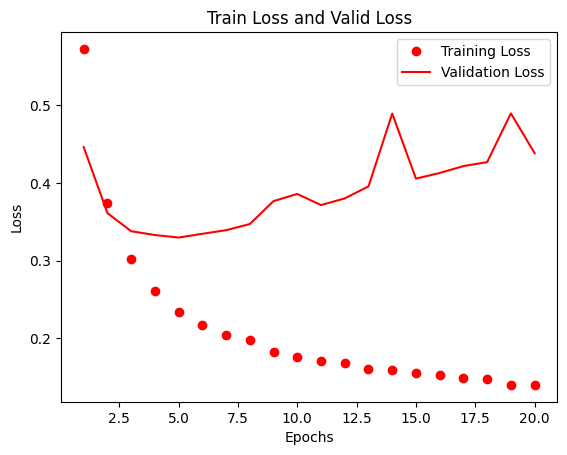

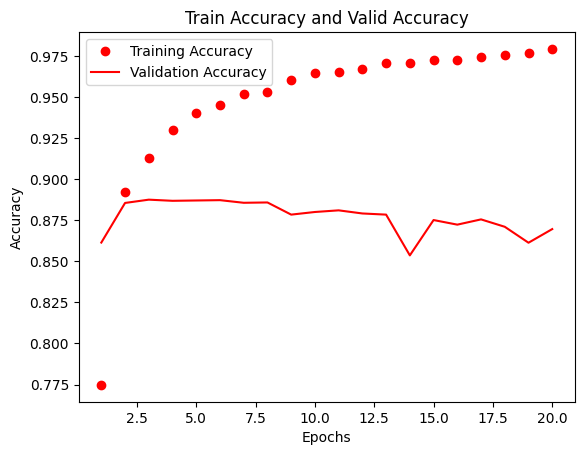

In [ ]:
history_dictionary_reg = history_reg.history
loss_value_reg= history_dictionary_reg["loss"]
val_loss_value_reg = history_dictionary_reg["val_loss"]
epochs_reg = range(1, len(loss_value_adam) + 1)
# plot the graph train and valid loss
plt.plot(epochs_reg, loss_value_reg, "ro", label="Training Loss")
plt.plot(epochs_reg, val_loss_value_reg, "r", label="Validation Loss")
plt.title("Train Loss and Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ploting  graph train and valid accuracy
plt.clf()
Accuracy_reg = history_dictionary_reg["accuracy"]
value_accuracy_reg = history_dictionary_reg["val_accuracy"]
plt.plot(epochs_reg, Accuracy_reg, "ro", label="Training Accuracy")
plt.plot(epochs_reg, value_accuracy_reg, "r", label="Validation Accuracy")
plt.title("Train Accuracy and Valid Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_reg.fit(j_train, z_train, epochs=6, batch_size=512)
result_reg= model_reg.evaluate(j_test, z_test)
print(result_reg)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9371 - loss: 0.2514
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9488 - loss: 0.2063
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9527 - loss: 0.1989
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9552 - loss: 0.1842
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9622 - loss: 0.1742
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9635 - loss: 0.1714
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8565 - loss: 0.4508
[0.44858089089393616, 0.8579999804496765]


**Result**

loss =0.48

Accuracy = 0.85

**Dropout**

In [ ]:
from tensorflow.keras import regularizers
model_Dropout= keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(part_j_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model_Dropout.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_Dropout = model_Dropout.fit(part_j_train, part_z_train, epochs=20, batch_size=512, validation_data=(j_value, z_value))

history.history.keys()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6040 - loss: 0.6563 - val_accuracy: 0.8370 - val_loss: 0.5045
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.7773 - loss: 0.5007 - val_accuracy: 0.8669 - val_loss: 0.4027
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8340 - loss: 0.4153 - val_accuracy: 0.8767 - val_loss: 0.3444
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8735 - loss: 0.3501 - val_accuracy: 0.8851 - val_loss: 0.3056
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8933 - loss: 0.3046 - val_accuracy: 0.8886 - val_loss: 0.2866
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9096 - loss: 0.2690 - val_accuracy: 0.8858 - val_loss: 0.2846
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9198 - loss: 0.2377 - val_accuracy: 0.8882 - val_loss: 0.2852
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9335 - loss: 0.2150 - val_accuracy: 0.8866 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

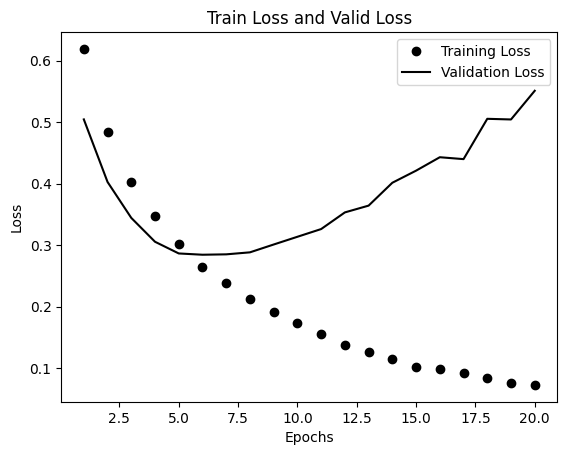

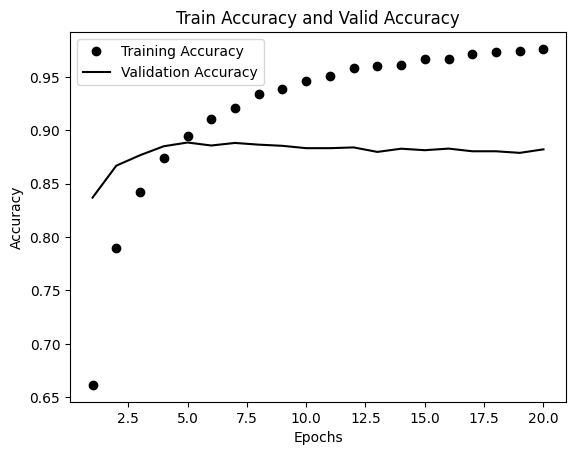

In [ ]:

history_dictionary_Dropout = history_Dropout.history
loss_value_Dropout = history_dictionary_Dropout["loss"]
val_loss_value_Dropout = history_dictionary_Dropout["val_loss"]
epochs_Dropout = range(1, len(loss_value_Dropout) + 1)
# plot the graph train and valid loss
plt.plot(epochs_Dropout, loss_value_Dropout, "ko", label="Training Loss")
plt.plot(epochs_Dropout, val_loss_value_Dropout, "k", label="Validation Loss")
plt.title("Train Loss and Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ploting  graph train and valid accuracy
plt.clf()
Accuracy_Dropout = history_dictionary_Dropout["accuracy"]
value_accuracy_Dropout = history_dictionary_Dropout["val_accuracy"]
plt.plot(epochs_Dropout, Accuracy_Dropout, "ko", label="Training Accuracy")
plt.plot(epochs_Dropout, value_accuracy_Dropout, "k", label="Validation Accuracy")
plt.title("Train Accuracy and Valid Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Dropout.fit(j_train, z_train, epochs=8, batch_size=512)
result_Dropout = model_Dropout.evaluate(j_test, z_test)
print(result_Dropout)

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9267 - loss: 0.2585
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9370 - loss: 0.2006
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9429 - loss: 0.1821
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9506 - loss: 0.1584
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9520 - loss: 0.1492
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9554 - loss: 0.1436
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9582 - loss: 0.1299
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9624 - loss: 0.1252
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8708 - loss: 0.4985
[0.484862357378006, 0.871720016002655]


**Result**

Loss = 0.49

Accuracy = 0.87

 **Hyper
tuning parameters**

In [ ]:

model_Hypertuning = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(1, activation="sigmoid")
])

# complie
model_Hypertuning.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_Hypertuning = model_Hypertuning.fit(part_j_train, part_z_train, epochs=20, batch_size=512, validation_data=(j_value, z_value))

# history train access
Hypertuning_history_dictionary = history_Hypertuning.history
Hypertuning_history_dictionary.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6744 - loss: 0.6171 - val_accuracy: 0.8481 - val_loss: 0.4148
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8910 - loss: 0.3468 - val_accuracy: 0.8780 - val_loss: 0.3241
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9207 - loss: 0.2444 - val_accuracy: 0.8899 - val_loss: 0.2888
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9429 - loss: 0.1872 - val_accuracy: 0.8850 - val_loss: 0.3002
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9519 - loss: 0.1586 - val_accuracy: 0.8856 - val_loss: 0.2957
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9641 - loss: 0.1311 - val_accuracy: 0.8838 - val_loss: 0.3111
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9714 - loss: 0.1098 - val_accuracy: 0.8835 - val_loss: 0.3282
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9749 - loss: 0.0971 - val_accuracy: 0.8773 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

About overfitting this algorithm prevents by adding the penality of 0.0001 to hyper turned in input, first, second, and third hidden layers of this algorithm. Specifically, the experiment is designed to turn binary classification,It is trained for 20 epochs of training, the batch size of 512, rmsprop as an optimizer and binary cross-entropy as a loss function.

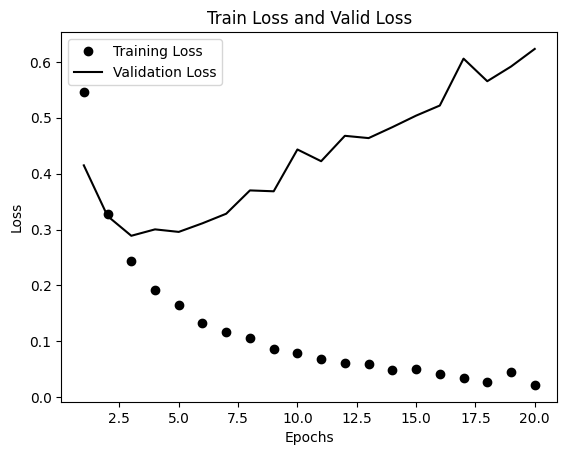

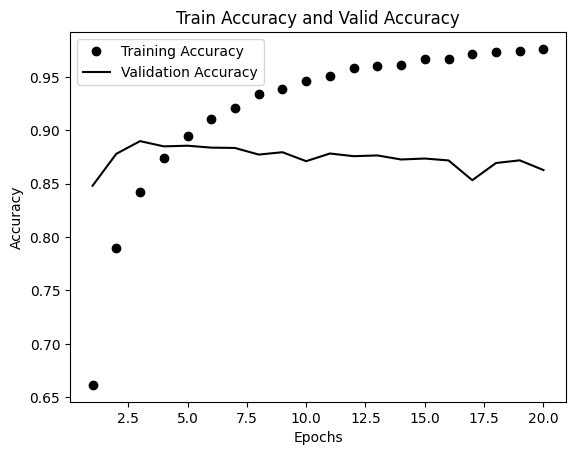

In [ ]:
history_dictionary_Hypertuning = history_Hypertuning.history
loss_value_Hypertuning = history_dictionary_Hypertuning["loss"]
val_loss_value_Hypertuning = history_dictionary_Hypertuning["val_loss"]
epochs_Hypertuning = range(1, len(loss_value_Hypertuning) + 1)
# plot the graph train and valid loss
plt.plot(epochs_Hypertuning, loss_value_Hypertuning, "ko", label="Training Loss")
plt.plot(epochs_Hypertuning, val_loss_value_Hypertuning, "k", label="Validation Loss")
plt.title("Train Loss and Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ploting  graph train and valid accuracy
plt.clf()
Accuracy_Hypertuning= history_dictionary_Dropout["accuracy"]
value_accuracy_Hypertuning = history_dictionary_Hypertuning["val_accuracy"]
plt.plot(epochs_Hypertuning, Accuracy_Hypertuning, "ko", label="Training Accuracy")
plt.plot(epochs_Hypertuning, value_accuracy_Hypertuning, "k", label="Validation Accuracy")
plt.title("Train Accuracy and Valid Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Hypertuning.fit(j_train, z_train, epochs=8, batch_size=512)
result_Hypertuning= model_Hypertuning.evaluate(j_test, z_test)
# printing the result
print(result_Hypertuning)

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9374 - loss: 0.2801
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9612 - loss: 0.1413
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9729 - loss: 0.1055
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9798 - loss: 0.0837
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9832 - loss: 0.0717
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9875 - loss: 0.0625
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9923 - loss: 0.0479
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9922 - loss: 0.0471
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8540 - loss: 0.6521
[0.6525566577911377, 0.8540800213813782]


Hyper tuning confirms the model efficiency by using the test data and the result is displayed at result Hyper tuning in the test accuracy and loss.

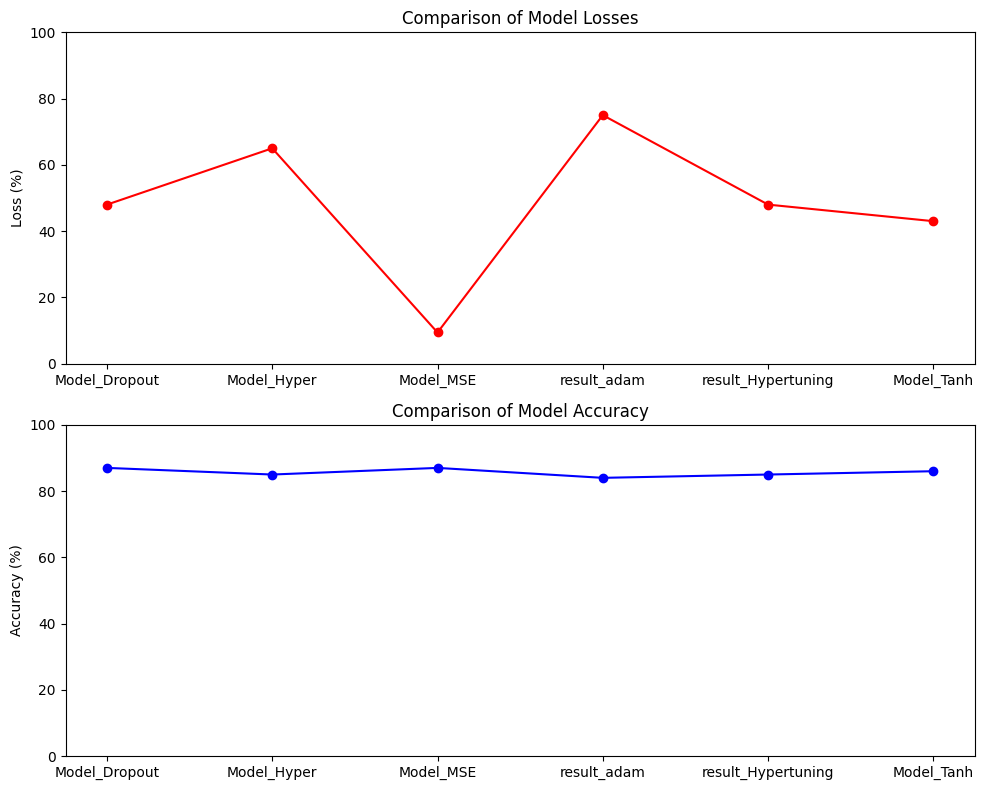

In [ ]:
# Summary result and graph
import numpy as np
import matplotlib.pyplot as plt

result_Dropout = [0.48, 0.87]
result_Hypertuning = [0.65, 0.85]
result_MSE = [0.094, 0.87]
result_adam = [0.75, 0.84]
result_reg= [0.48, 0.85]
result_tanh = [0.43, 0.86]

Loss = np.array([result_Dropout[0], result_Hypertuning[0], result_MSE[0],
                        result_adam[0],result_reg[0], result_tanh[0]]) * 100
Accuracy = np.array([result_Dropout[1], result_Hypertuning[1], result_MSE[1],
                           result_adam[1], result_reg[1], result_tanh[1]]) * 100

Labels = ['Model_Dropout', 'Model_Hyper', 'Model_MSE', 'result_adam', 'result_Hypertuning', 'Model_Tanh']

# Create a figure with subplots
fig, ax1 = plt.subplots(2, 1, figsize=(10, 8))

# Plot the graph for loss
ax1[0].plot(Labels, Loss, marker='o', linestyle='-', color='red')
ax1[0].set_title('Comparison of Model Losses')
ax1[0].set_ylabel('Loss (%)')
ax1[0].set_ylim(0, 100)

# plot the grpah for Accuracy
ax1[1].plot(Labels, Accuracy, marker='o', linestyle='-', color='blue')
ax1[1].set_title('Comparison of Model Accuracy')
ax1[1].set_ylabel('Accuracy (%)')
ax1[1].set_ylim(0, 100)


# showing the plot
plt.tight_layout()
plt.show()


To this aim, the provided code paves the comparison of the loss and accuracy measures of different machine learning models.  After that, the accuracy and loss results of each of six models are shown as follows: When converted, these outcomes are stored in arrays in terms of percentage. It is possible to produce a figure with two subplots: a red line graph that depicts the loss of the model and another graph, a blue one, that portrays the accuracy of the model. For better comparison, each graph has a fixed scale on y-axis from 0 to 100 and explicit features: data points, title, and y-labels. When everything is just right the plots are shown subsequent to the layout has been modified to increase the amount of spacing.

**Conclusion**

The first structure related to a neural network that was built had one hidden layer with a total of 16 neurons-units and also  i used 3 rd hidden layer, binary crossentropy was the loss function and ReLU was used as activation function. Data was then imported and analytic settings were set and created. The training experiments were performed by including the number of units in each layer as 32, 64, and increasing the number of hidden layers.Two and three The accuracy for two and three although greater, implied a higher likelihood of overfitting of the models.ReLU activation. Data was then imported and analytic settings were established. Experiments were conducted to improve model performance by varying the number of units per layer 32, 64, and increasing the number of hidden levels. Two and three  Although accuracy was generally increased with more units, there was an increased risk of overfitting. Additionally, there was no significant difference when using the **mean squared error**instead of binary crossentropy. Some improvements to the accuracy were achieved by tweaking the architecture and parameters but a lot of consideration had to be taken when selecting the right loss function and when it came to avoiding overfitting.